In [2]:
import os
import openai
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import csv
from scipy.stats import erlang

print(os.getenv("OPENAI_API_KEY"))
openai.api_key = ''




None


In [71]:
start_time = time.time()
tea_cake1 = openai.Completion.create(
  model="text-ada-001",
  prompt="Each day, on your way to class, you walk past a coffee shop. \
    The shop has recently started a new advertising campaign: they bake fresh teacakes regularly throughout the day,\
    and have a clock outside that shows how long it has been since the teacakes were taken out of the oven. \
    You are interested in buying a teacake as soon as it is removed from the oven, and wonder how often batches of teacakes are baked. \
    Today, the clock shows that it has been 34 minutes since the last batch of teacakes was removed from the oven. \
    Please write down your best guess of how much time elapses between batches of teacakes, in minutes. \
    Try to make a guess, even if you feel like you don’t have enough information to make a decision—just go with your gut feeling. \
    may assume that the batches of teacakes are always separated by the same amount of time.",
  temperature=1.2,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)
print(tea_cake1.choices[0]['text'])



melon a"Teacake"

34 minutes


In [72]:
tea_cake2 = openai.Completion.create(
    model="text-ada-001",
    prompt="Each day, on your way to class, you walk past a coffee shop. \
    The shop has recently started a new advertising campaign: they bake fresh teacakes regularly throughout the day,\
    and have a clock outside that shows how long it has been since the teacakes were taken out of the oven. \
    You are interested in buying a teacake as soon as it is removed from the oven, and wonder how often batches of teacakes are baked. \
    Today, the clock shows that it has been 34 minutes since the last batch of teacakes was removed from the oven. \
    Please write down your best guess of how much time elapses between batches of teacakes, in minutes. \
    Try to make a guess, even if you feel like you don’t have enough information to make a decision—just go with your gut feeling. \
    may assume that the batches of teacakes are always separated by the same amount of time." \
    + tea_cake1.choices[0]['text'] + "\n\n Suppose that you check the clock on your way to class for the next two days. Each time, you note how long it has been since the \
    teacakes came out of the oven. Including the first day, the times you have seen are 34, 8, and 21 minutes. \
    \n\n Please write down your new best guess of how much time elapses between batches of teacakes, in minutes.",
    temperature=1.2,
    max_tokens=256,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0
    )

print(tea_cake2.choices[0]['text'])



 Includes the first day, the times you have seen are 34, 8, and 21 minutes.


In [75]:
tea_cake3 = openai.Completion.create(
    model="text-ada-001",
    prompt="Each day, on your way to class, you walk past a coffee shop. \
    The shop has recently started a new advertising campaign: they bake fresh teacakes regularly throughout the day,\
    and have a clock outside that shows how long it has been since the teacakes were taken out of the oven. \
    You are interested in buying a teacake as soon as it is removed from the oven, and wonder how often batches of teacakes are baked. \
    Today, the clock shows that it has been 34 minutes since the last batch of teacakes was removed from the oven. \
    Please write down your best guess of how much time elapses between batches of teacakes, in minutes. \
    Try to make a guess, even if you feel like you don’t have enough information to make a decision—just go with your gut feeling. \
    may assume that the batches of teacakes are always separated by the same amount of time." \
    + tea_cake1.choices[0]['text'] + "\n\n Suppose that you check the clock on your way to class for the next two days. Each time, you note how long it has been since the \
    teacakes came out of the oven. Including the first day, the times you have seen are 34, 8, and 21 minutes. \
    \n\n Please write down your new best guess of how much time elapses between batches of teacakes, in minutes."\
    + tea_cake2.choices[0]['text'] + "Suppose that you note the time on the clock every time you walk past the coffee shop in the next week, \
    checking how long it has been since the teacakes came out of the oven. Including the three days from the previous week, the times you have \
    seen are 8, 21, 18, 2, 5, 27, 22, 10, 14 and 34 minutes. \n\n \
    Please write down your new best guess of the time interval between batches of teacakes, in minutes. ",

    temperature=1.2,
    max_tokens=256,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0
    )

print(tea_cake3.choices[0]['text'])


Includes the time intervals between batches of teacakes, every day for the next week.
 12, 71, IV

CLOSE

 Surrey

3 hours

 Mov Price

 ($)


 dipping

 dinosaur

2 hours

 Mov Price

 ($)



 stakes

1 hour

 Mov Price

 ($)


In [77]:
#tea cake with original prompt
def tea_cake(text_model, temp=0.9, p=0.5, freq_p=0, pres_p=0):
    tea_cake1 = openai.Completion.create(
    model=text_model,
    prompt="A bakery bakes a fresh batch of tea cakes at the same time interval throughout the day, \
    and have a clock outside that shows how long it has been since the last batch was removed from the oven. \
    You are interested in buying a teacake as soon as it is removed from the oven, and wonder what the time interval is.\
    Today, the clock shows that it has been 34 minutes since the last batch of teacakes was removed from the oven.\n\n\
    Please write down your best guess of how much time elapses between batches of teacakes, in minutes. Try to make a guess, even if you feel like you don’t \
    have enough information to make a decision—just go with your gut feeling. You may assume that the batches of teacakes are always separated by the same amount of time.",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=freq_p,
    presence_penalty=pres_p
    )

    
    tea_cake2 = openai.Completion.create(
    model=text_model,
    prompt="A bakery bakes a fresh batch of tea cakes at the same time interval throughout the day, \
    and have a clock outside that shows how long it has been since the last batch was removed from the oven. \
    You are interested in buying a teacake as soon as it is removed from the oven, and wonder what the time interval is.\
    Today, the clock shows that it has been 34 minutes since the last batch of teacakes was removed from the oven.\n\n\
    Please write down your best guess of how much time elapses between batches of teacakes, in minutes. Try to make a guess, even if you feel like you don’t \
    have enough information to make a decision—just go with your gut feeling. You may assume that the batches of teacakes are always separated by the same amount of time."\
    + tea_cake1.choices[0]['text'] + "\n\n Suppose that you check the clock on your way to class for the next two days. Each time, you note how long it has been since the \
    teacakes came out of the oven. Including the first day, the times you have seen are 34, 8, and 21 minutes.\
    \n\n Please write down your new best guess of how much time elapses between batches of teacakes, in minutes",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=freq_p,
    presence_penalty=pres_p
    )

    tea_cake3 = openai.Completion.create(
    model=text_model,
    prompt="A bakery bakes a fresh batch of tea cakes at the same time interval throughout the day, \
    and have a clock outside that shows how long it has been since the last batch was removed from the oven. \
    You are interested in buying a teacake as soon as it is removed from the oven, and wonder what the time interval is.\
    Today, the clock shows that it has been 34 minutes since the last batch of teacakes was removed from the oven.\n\n\
    Please write down your best guess of how much time elapses between batches of teacakes, in minutes. Try to make a guess, even if you feel like you don’t \
    have enough information to make a decision—just go with your gut feeling. You may assume that the batches of teacakes are always separated by the same amount of time."\
        + tea_cake1.choices[0]['text'] + "\n\n Suppose that you check the clock on your way to class for the next two days. Each time, you note how long it has been since the \
        teacakes came out of the oven. Including the first day, the times you have seen are 34, 8, and 21 minutes.\
        \n\n Please write down your new best guess of how much time elapses between batches of teacakes, in minutes" \
        + tea_cake2.choices[0]['text'] + "Suppose that you note the time on the clock every time you walk past the coffee shop in the next week, \
        checking how long it has been since the teacakes came out of the oven. Including the three days from the previous week, the times you have \
        seen are 34, 8, 21, 18, 2, 5, 27, 22, 10, and 14 minutes. \n\nPlease write down your new best guess of how much time elapses between batches of teacakes, in minutes.",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=freq_p,
    presence_penalty=pres_p
    )


    return tea_cake1.choices[0]['text'], tea_cake2.choices[0]['text'], tea_cake3.choices[0]['text']





In [78]:
print(tea_cake("text-davinci-003", 0, 0.1))

('\n\nMy best guess is that the time interval between batches of teacakes is 34 minutes.', '.\n\nMy new best guess is that the time interval between batches of teacakes is 24 minutes.', '\n\nMy new best guess is that the time interval between batches of teacakes is 20 minutes.')


In [257]:
#create csv with original prompt using davinci model
with open("davinci_teacake_temp_original_prompt.csv", "w") as file:
    temp = 1.2
    p = 1
    writer = csv.writer(file)
    writer.writerow(["Result 1", "Result 2", "Result 3"])
    for i in range(80):
        tea_cake_1 = tea_cake(text_model="text-davinci-003", temp=temp, p=p)
        writer.writerow([tea_cake_1[0], tea_cake_1[1], tea_cake_1[2]])

<ErrorbarContainer object of 3 artists>

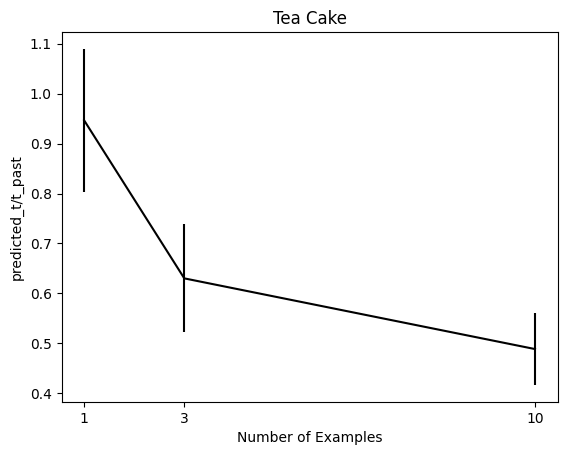

In [102]:
#plot davinci results on original prompt
fig = plt.figure()
x = [1, 3, 10]
tea_org_y = [0.9466911765, 0.6301470588, 0.4886029412]
tea_org_yerr = [0.1428737136, 0.1083212736, 0.07181451435]
plt.ylabel("predicted_t/t_past")
plt.xlabel("Number of Examples")
plt.xticks([1, 3, 10])
plt.title("Tea Cake")
plt.errorbar(x, tea_org_y, yerr=tea_org_yerr, label='both limits (default)', color='k')

# plt.legend(loc='lower right')

In [80]:
#tea cake with altered prompt
def tea_cake_2(text_model, temp=0.9, p=0.5, freq_p=0, pres_p=0):
    tea_cake1 = openai.Completion.create(
    model=text_model,
    prompt="A bakery bakes a fresh batch of tea cakes at the same time interval throughout the day, \
    and have a clock outside that shows how long it has been since the last batch was removed from the oven. \
    You are interested in buying a teacake as soon as it is removed from the oven, and wonder what the time interval is.\
    You know that the time interval can't be any shorter than the longest time you've seen, but may be longer. \
    Today, the clock shows that it has been 34 minutes since the last batch of teacakes was removed from the oven. So it must be greater than or equal to 34 minutes!\n\n\
    Please write down your best guess of how much time elapses between batches of teacakes, in minutes. Try to make a guess, even if you feel like you don’t \
    have enough information to make a decision—just go with your gut feeling. You may assume that the batches of teacakes are always separated by the same amount of time.",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=freq_p,
    presence_penalty=pres_p
    )

    
    tea_cake2 = openai.Completion.create(
    model=text_model,
    prompt="A bakery bakes a fresh batch of tea cakes at the same interval throughout the day, \
    and have a clock outside that shows how long it has been since the last batch was removed from the oven. \
    You are interested in buying a teacake as soon as it is removed from the oven, and wonder what the interval is.\
    You know that the time interval can't be any shorter than the longest time you've seen, but may be longer. \
    Today, the clock shows that it has been 34 minutes since the last batch of teacakes was removed from the oven. So it must be greater than or equal to 34 minutes!\n\n\
    Please write down your best guess of the time-interval between batches of teacakes, in minutes. Try to make a guess, even if you feel like you don’t \
    have enough information to make a decision—just go with your gut feeling. You may assume that the batches of teacakes are always separated by the same amount of time."\
    + tea_cake1.choices[0]['text'] + "\n\n Suppose that you check the clock on your way to class for the next two days. Each time, you note how long it has been since the \
    teacakes came out of the oven. Including the first day, the times you have seen are 8, 21 and 34 minutes. The time interval must be greater than or equal to 34 minutes. \
    \n\n Please write down your new best guess of how much time elapses between batches of teacakes, in minutes.",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=freq_p,
    presence_penalty=pres_p
    )

    tea_cake3 = openai.Completion.create(
    model=text_model,
    prompt="A bakery bakes a fresh batch of tea cakes at the same time interval throughout the day, \
    and have a clock outside that shows how long it has been since the last batch was removed from the oven. \
    You are interested in buying a teacake as soon as it is removed from the oven, and wonder what the time interval is. \
    You know that the time interval can't be any shorter than the longest time you've seen, but may be longer. \
    Today, the clock shows that it has been 34 minutes since the last batch of teacakes was removed from the oven. So it must be greater than or equal to 34 minutes!\n\n\
    Please write down your best guess of how much time elapses between batches of teacakes, in minutes. Try to make a guess, even if you feel like you don’t \
    have enough information to make a decision—just go with your gut feeling. You may assume that the batches of teacakes are always separated by the same amount of time."\
    + tea_cake1.choices[0]['text'] + "\n\n Suppose that you check the clock on your way to class for the next two days. Each time, you note how long it has been since the \
    teacakes came out of the oven. Including the first day, the times you have seen are 34, 8, and 21 minutes.\
    \n\n Please write down your new best guess of time interval between batches of teacakes, in minutes" \
    + tea_cake2.choices[0]['text'] + "Suppose that you note the time on the clock every time you walk past the coffee shop in the next week, \
    checking how long it has been since the teacakes came out of the oven. Including the three days from the previous week, the times you have \
    seen are 34, 8, 21, 18, 2, 5, 27, 22, 10, and 14 minutes. \n\n  The time interval must be greater than or equal to 34 minutes.\
    Please write down your new best guess of the time interval between batches of teacakes, in minutes. ",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=freq_p,
    presence_penalty=pres_p
    )


    return tea_cake1.choices[0]['text'], tea_cake2.choices[0]['text'], tea_cake3.choices[0]['text']

In [93]:
print(tea_cake_2("text-davinci-003", 1.2, 1))

('\n\nMy best guess is that the bakery bakes a fresh batch of tea cakes at intervals of 40 minutes.', ' Again, make an estimate even if you feel like you     don’t have enough information. \n\nMy new best guess is that the bakery bakes a fresh batch of tea cakes at intervals of 38 minutes.', '\n\nMy new best guess is that the bakery bakes a fresh batch of tea cakes at intervals of 30 minutes.')


In [244]:
#create csv with curie model on altered prompt
with open("curie_teacake_temp_1_2_p_1.csv", "w") as file:
    temp = 1.2
    p = 1
    writer = csv.writer(file)
    writer.writerow(["Result 1", "Result 2", "Result 3"])
    for i in range(80):
        tea_cake = tea_cake_2(text_model="text-curie-001", temp=temp, p=p)
        writer.writerow([tea_cake[0], tea_cake[1], tea_cake[2]])

[[0.1428737136, 0.1083212736, 0.07181451435], [0.1428737136, 0.1083212736, 0.07181451435]]


<ErrorbarContainer object of 3 artists>

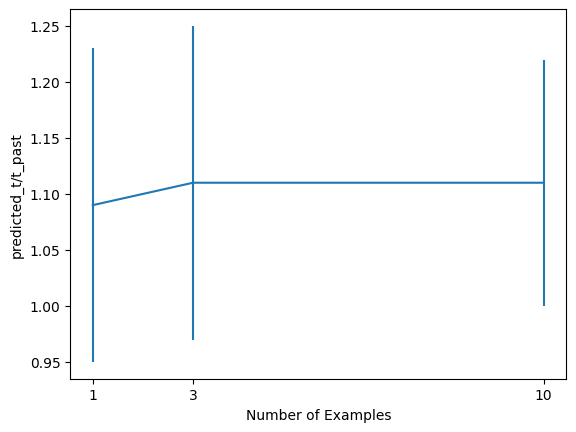

In [582]:
#plot curie results on altered prompt
fig = plt.figure()
x = [1, 3, 10]
tea_curie_y = [1.09, 1.11, 1.11]
tea_curie_yerr = [0.14, 0.14, 0.11]
print(yerr)
plt.ylabel("predicted_t/t_past")
plt.xlabel("Number of Examples")
plt.xticks([1, 3, 10])
plt.errorbar(x, tea_curie_y, yerr=tea_curie_yerr, label='both limits (default)')

In [ ]:
#create csv with davinci model on altered prompt
with open("davinci_teacake_temp_1_2_p_1.csv", "w") as file:
    temp = 1.2
    p = 1
    writer = csv.writer(file)
    writer.writerow(["Result 1", "Result 2", "Result 3"])
    for i in range(80):
        tea_cake = tea_cake_2(text_model="text-davinci-003", temp=temp, p=p)
        writer.writerow([tea_cake[0], tea_cake[1], tea_cake[2]])

<ErrorbarContainer object of 3 artists>

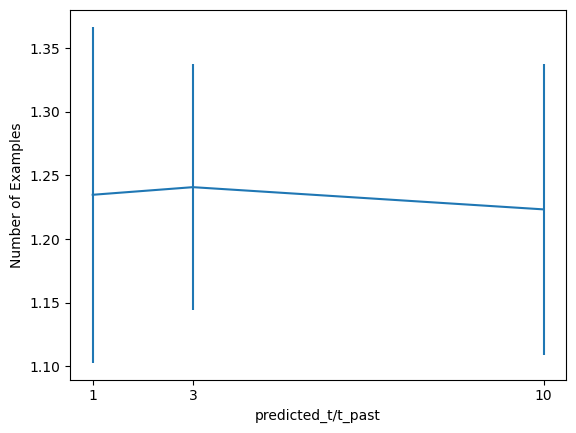

In [581]:
#plot davinci results on altered prompt
fig = plt.figure()
x = [1, 3, 10]
tea_alt_y = [1.234795613, 1.240777667, 1.22333001]
tea_alt_yerr = [0.1319287235, 0.09639031196, 0.1140576477]
plt.xlabel("predicted_t/t_past")
plt.ylabel("Number of Examples")
plt.xticks([1, 3, 10])

plt.errorbar(x, tea_alt_y, yerr=tea_alt_yerr, label='both limits (default)')

In [334]:
train1 = openai.Completion.create(
  model="text-davinci-003",
  prompt="How long do you usually have to wait for trains at a station in an efficiently run country like Japan?",
  temperature=1.2,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)
print(train1.choices[0]['text'])



The wait time for any given train will vary depending on the time of day, destination, and numerous other factors. In Japan, as in many diiferent countries, passengers can consult a station timetable (either online or in the station) for specific information about station wait times. On average, wait times are less than five minutes during peak hours, sometimes stretching to 10 minutes or more at less busy times.


In [346]:
train_prior= openai.Completion.create(
  model="text-davinci-003",
  prompt="How long do you usually have to wait for trains in seconds at a station in an efficiently run country?",
  temperature=1.2,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)
print(train_prior.choices[0]['text'])

train1 = openai.Completion.create(
  model="text-davinci-003",
  prompt="How long do you usually have to wait for trains at a station in an efficiently run country?.\n\n" \
    + train_prior.choices[0]['text'] + "Now imagine that you are visiting a foreign country, and want to catch a subway train. Your guidebook says that the subway service is very efficient,\
     with trains running to fixed schedules, guaranteeing that you won’t have to wait very long at the station. \
    The book doesn’t mention how much time passes between trains, so you will have to try to guess. When you get to the station, \
    you see a clock on the wall indicating that the next train will arrive in 103 seconds. So the amount of time between trains must be greater than or equal to 103 seconds.\
    \n\nPlease write down your best guess of how much time elapses between trains arriving, in seconds. Try to make a guess, even if you feel like you don’t \
    have enough information to make a decision—just go with your gut feeling. You may assume that the time between trains arriving is separated by the same amount of time.",
  temperature=1.2,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

print(train1.choices[0]['text'])



It depends on the country and the type of train station. Generally, most trains arrive every few minutes at busy stations, although these intervals may stretch to several minutes at off-peak times. Other stations may be scheduled, so arrival times may vary up to an hour.


My best guess would be 120 seconds.


In [339]:
print(train1.choices[0]['text'])

 

My best guess is that the time between trains arriving to the station is about 90 seconds.


In [284]:
train2 = openai.Completion.create(
  model="text-curie-001",
  prompt="Imagine that you are visiting a foreign country, and want to catch a subway train. Your guidebook says that the subway service is very efficient,\
    with trains running to fixed schedules, guaranteeing that you won’t have to wait very long at the station. \
    The book doesn’t mention how much time passes between trains, so you will have to try to guess. When you get to the station, \
    you see a clock on the wall indicating that the next train will arrive in 103 seconds.\
    \n\nPlease write down your best guess of how much time elapses between trains arriving, in seconds. Try to make a guess, even if you feel like you don’t \
    have enough information to make a decision—just go with your gut feeling. You may assume that the time between trains arriving is separated by the same amount of time."\
    + train1.choices[0]['text'] + "\n\n Suppose that you check the clock for the next two hours. Each time, you note how long it has been since the \
    last train arrived. Including the first train, the times you have seen are 103 seconds, 34 seconds, and 72 seconds. \
    \n\nPlease write down your best guess of how much time elapses between trains arriving, in seconds.",
  temperature=1.2,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

In [285]:
print(train2.choices[0]['text'])

 Try to make a guess, even if you feel like you don’t have enough information to make a decision—just go with your gut feeling.

My guess is that the time between trains arriving is 103 seconds.


In [286]:

train3 = openai.Completion.create(
  model="text-curie-001",
  prompt="Imagine that you are visiting a foreign country, and want to catch a subway train. Your guidebook says that the subway service is very efficient,\
    with trains running to fixed schedules, guaranteeing that you won’t have to wait very long at the station. \
    The book doesn’t mention how much time passes between trains, so you will have to try to guess. When you get to the station, \
    you see a clock on the wall indicating that the next train will arrive in 103 seconds.\
    \n\nPlease write down your best guess of how much time elapses between trains arriving, in minutes. Try to make a guess, even if you feel like you don’t \
    have enough information to make a decision—just go with your gut feeling. You may assume that the time between trains arriving is separated by the same amount of time."\
    + train1.choices[0]['text'] + "\n\n Suppose that you check the clock for the next two hours. Each time, you note how long it has been since the \
    last train arrived. Including the first train, the times you have seen are 103 seconds, 34 seconds, and 72 seconds. \
    \n\nPlease write down your best guess of how much time elapses between trains arriving, in minutes."\
    + train2.choices[0]['text'] + "Suppose that you note the time on the clock every time you see a train arrive over the next 8 hours, \
    checking how long it has been since the last train arrived. Including the two hours previously, the times you have seen are \
    103s, 34s, 72s, 61s, 17s, 29s, 101s, 97s, 42s, and 52s\n\nPlease write down your best guess of how much time elapses between trains arriving, in minutes.",
  temperature=1.2,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

In [287]:
print(train3.choices[0]['text'])



My guess is that the time between trains arriving is 103 seconds.


In [289]:
#train with original prompt
def train(model, temp, p):
    train1 = openai.Completion.create(
    model=model,
    prompt="Imagine that you are visiting a foreign country, and want to catch a subway train. Your guidebook says that the subway service is very efficient,\
        with trains running to fixed schedules, guaranteeing that you won’t have to wait very long at the station. \
        The book doesn’t mention how much time passes between trains, so you will have to try to guess. When you get to the station, \
        you see a clock on the wall indicating that the next train will arrive in 103 seconds. \
        \n\nPlease write down your best guess of how much time elapses between trains arriving, in seconds. Try to make a guess, even if you feel like you don’t \
        have enough information to make a decision—just go with your gut feeling. You may assume that the time between trains arriving is separated by the same amount of time.",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=0,
    presence_penalty=0
    )
    train2 = openai.Completion.create(
    model=model,
    prompt="Imagine that you are visiting a foreign country, and want to catch a subway train. Your guidebook says that the subway service is very efficient,\
        with trains running to fixed schedules, guaranteeing that you won’t have to wait very long at the station. \
        The book doesn’t mention how much time passes between trains, so you will have to try to guess. When you get to the station, \
        you see a clock on the wall indicating that the next train will arrive in 103 seconds.\
        \n\nPlease write down your best guess of how much time elapses between trains arriving, in seconds. Try to make a guess, even if you feel like you don’t \
        have enough information to make a decision—just go with your gut feeling. You may assume that the time between trains arriving is separated by the same amount of time."\
        + train1.choices[0]['text'] + "\n\n Suppose that you check the clock for the next two hours. Each time, you note how long it has been since the \
        last train arrived. Including the first train, the times you have seen are 103 seconds, 34 seconds, and 72 seconds. \
        \n\nPlease write down your best guess of how much time elapses between trains arriving, in seconds.",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=0,
    presence_penalty=0
    )
    train3 = openai.Completion.create(
    model=model,
    prompt="Imagine that you are visiting a foreign country, and want to catch a subway train. Your guidebook says that the subway service is very efficient,\
        with trains running to fixed schedules, guaranteeing that you won’t have to wait very long at the station. \
        The book doesn’t mention how much time passes between trains, so you will have to try to guess. When you get to the station, \
        you see a clock on the wall indicating that the next train will arrive in 103 seconds.\
        \n\nPlease write down your best guess of how much time elapses between trains arriving, in minutes. Try to make a guess, even if you feel like you don’t \
        have enough information to make a decision—just go with your gut feeling. You may assume that the time between trains arriving is separated by the same amount of time."\
        + train1.choices[0]['text'] + "\n\n Suppose that you check the clock for the next two hours. Each time, you note how long it has been since the \
        last train arrived. Including the first train, the times you have seen are 103 seconds, 34 seconds, and 72 seconds. \
        \n\nPlease write down your best guess of how much time elapses between trains arriving, in minutes."\
        + train2.choices[0]['text'] + "Suppose that you note the time on the clock every time you see a train arrive over the next 8 hours, \
        checking how long it has been since the last train arrived. Including the two hours previously, the times you have seen are \
        103s, 34s, 72s, 61s, 17s, 29s, 101s, 97s, 42s, and 52s\n\nPlease write down your best guess of how much time elapses between trains arriving, in minutes.",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=0,
    presence_penalty=0
    )

    return train1.choices[0]['text'], train2.choices[0]['text'], train3.choices[0]['text']

In [329]:
train_result = train("text-davinci-003", 1.2, 1)
print(train_result[0], train_result[1], train_result[2])



My best guess is that the time between trains arriving is 93 seconds.  Try to make a guess even if you feel like you don’t     have enough information to make a decision—just go with your gut feeling.

My best guess is that the time between trains arriving is 47 seconds.  Try to make a guess, even if you feel like you don’t have enough information to make a decision—just go with your gut feeling.

My best guess is that the time between trains arriving is 55 seconds.


In [307]:
#train with original prompt
def train_alt(model, temp, p):
    train1 = openai.Completion.create(
    model=model,
    prompt="Imagine that you are visiting a foreign country, and want to catch a subway train. Your guidebook says that the subway service is very efficient,\
        with trains running to fixed schedules, guaranteeing that you won’t have to wait very long at the station. \
        The book doesn’t mention how much time passes between trains, so you will have to try to guess. When you get to the station, \
        you see a clock on the wall indicating that the next train will arrive in 103 seconds. So the amount of time between trains must be greater than or equal to 103 seconds.\
        \n\nPlease write down your best guess of how much time elapses between trains arriving, in seconds. Try to make a guess, even if you feel like you don’t \
        have enough information to make a decision—just go with your gut feeling. You may assume that the time between trains arriving is separated by the same amount of time.",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=0,
    presence_penalty=0
    )
    train2 = openai.Completion.create(
    model=model,
    prompt="Imagine that you are visiting a foreign country, and want to catch a subway train. Your guidebook says that the subway service is very efficient,\
        with trains running to fixed schedules, guaranteeing that you won’t have to wait very long at the station. \
        The book doesn’t mention how much time passes between trains, so you will have to try to guess. When you get to the station, \
        you see a clock on the wall indicating that the next train will arrive in 103 seconds. So the amount of time between trains must be greater than or equal to 103 seconds.\
        \n\nPlease write down your best guess of how much time elapses between trains arriving, in seconds. Try to make a guess, even if you feel like you don’t \
        have enough information to make a decision—just go with your gut feeling. You may assume that the time between trains arriving is separated by the same amount of time."\
        + train1.choices[0]['text'] + "\n\n Suppose that you check the clock for the next two hours. Each time, you note how long it has been since the \
        last train arrived. Including the first train, the times you have seen are 103 seconds, 34 seconds, and 72 seconds. \
        \n\nPlease write down your best guess of how much time elapses between trains arriving, in seconds. The amount of time between trains must be greater than or equal to 103 seconds.",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=0,
    presence_penalty=0
    )
    train3 = openai.Completion.create(
    model=model,
    prompt="Imagine that you are visiting a foreign country, and want to catch a subway train. Your guidebook says that the subway service is very efficient,\
        with trains running to fixed schedules, guaranteeing that you won’t have to wait very long at the station. \
        The book doesn’t mention how much time passes between trains, so you will have to try to guess. When you get to the station, \
        you see a clock on the wall indicating that the next train will arrive in 103 seconds. So the amount of time between trains must be greater than or equal to 103 seconds.\
        \n\nPlease write down your best guess of how much time elapses between trains arriving, in minutes. Try to make a guess, even if you feel like you don’t \
        have enough information to make a decision—just go with your gut feeling. You may assume that the time between trains arriving is separated by the same amount of time."\
        + train1.choices[0]['text'] + "\n\n Suppose that you check the clock for the next two hours. Each time, you note how long it has been since the \
        last train arrived. Including the first train, the times you have seen are 103 seconds, 34 seconds, and 72 seconds. \
        \n\nPlease write down your best guess of how much time elapses between trains arriving, in minutes."\
        + train2.choices[0]['text'] + "Suppose that you note the time on the clock every time you see a train arrive over the next 8 hours, \
        checking how long it has been since the last train arrived. Including the two hours previously, the times you have seen are \
        103s, 34s, 72s, 61s, 17s, 29s, 101s, 97s, 42s, and 52s\n\nPlease write down your best guess of how much time elapses between trains arriving, in seconds. \
        The amount of time between trains must be greater than or equal to 103 seconds.",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=0,
    presence_penalty=0
    )

    return train1.choices[0]['text'], train2.choices[0]['text'], train3.choices[0]['text']

In [327]:
train_result = train_alt("text-davinci-003", 1.2, 1)
print(train_result[0], train_result[1], train_result[2])



My best guess is that the time elapses between two trains arriving is 120 seconds. 

My best guess is that the time elapses between two trains arriving is 120 seconds. 

My best guess is that the time elapses between two trains arriving is 120 seconds.


In [331]:
#create csv with davinci model on altered prompt
with open("davinci_train_temp_1_2_p_1.csv", "w") as file:
    temp = 1.2
    p = 1
    writer = csv.writer(file)
    writer.writerow(["Result 1", "Result 2", "Result 3"])
    for i in range(80):
        train_result = train_alt(model="text-davinci-003", temp=temp, p=p)
        writer.writerow([train_result[0], train_result[1], train_result[2]])

<ErrorbarContainer object of 3 artists>

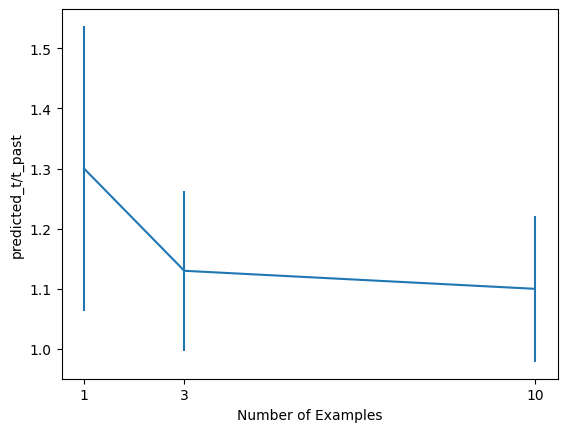

In [580]:
#plot davinci train results
fig = plt.figure()
x = [1, 3, 10]
train_y = [1.30, 1.13, 1.10]
train_yerr = [0.2373639961, 0.1333000177, 0.1216016995]
plt.ylabel("predicted_t/t_past")
plt.xlabel("Number of Examples")
plt.xticks([1, 3, 10])

plt.errorbar(x, train_y, yerr=train_yerr, label='both limits (default)')

In [350]:

model = "text-davinci-003"
temp = 1.2
p = 1
toxin1= openai.Completion.create(
    model=model,
    prompt="On a visit to the doctor, you undergo a range of tests. In one case, the doctor informs you that he is testing for levels of a certain environmental toxin in your blood.\n\n \
He has a chart that indicates healthy levels of environmental toxins, but you can’t quite read the numbers indicating the threshold between healthy and unhealthy amounts.\
The doctor tells you that you need only get another appointment if the test suggests that you have unhealthy levels of toxin in your blood. When you go in to pick up your results, \
you find a stack of reports that have been classified as 'healthy.' You are relieved to find your report in the “healthy” stack. \
You see that the concentration listed on your report is 34 ng/mL.\n\nPlease write down your best guess of what the unhealthy threshold is. Try to make a guess, even if you feel like you don’t \
        have enough information to make a decision—just go with your gut feeling.",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=0,
    presence_penalty=0
    )

print(toxin1.choices[0]['text'])



My best guess for the unhealthy threshold is 50 ng/mL.


In [351]:
#toxin with original prompt
def toxin_org(model, temp, p):
    toxin1 = openai.Completion.create(
    model=model,
    prompt="On a visit to the doctor, you undergo a range of tests. In one case, the doctor informs you that he is testing for levels of a certain environmental toxin in your blood.\n\n \
He has a chart that indicates healthy levels of environmental toxins, but you can’t quite read the numbers indicating the threshold between healthy and unhealthy amounts.\
The doctor tells you that you need only get another appointment if the test suggests that you have unhealthy levels of toxin in your blood. When you go in to pick up your results, \
you find a stack of reports that have been classified as 'healthy.' You are relieved to find your report in the “healthy” stack. \
You see that the concentration listed on your report is 34 ng/mL.\n\nPlease write down your best guess of what the unhealthy threshold is. Try to make a guess, even if you feel like you don’t \
        have enough information to make a decision—just go with your gut feeling.",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=0,
    presence_penalty=0
    )
    toxin2 = openai.Completion.create(
    model=model,
    prompt="On a visit to the doctor, you undergo a range of tests. In one case, the doctor informs you that he is testing for levels of a certain environmental toxin in your blood.\n\n \
He has a chart that indicates healthy levels of environmental toxins, but you can’t quite read the numbers indicating the threshold between healthy and unhealthy amounts.\
The doctor tells you that you need only get another appointment if the test suggests that you have unhealthy levels of toxin in your blood. When you go in to pick up your results, \
you find a stack of reports that have been classified as 'healthy.' You are relieved to find your report in the “healthy” stack. \
You see that the concentration listed on your report is 34 ng/mL.\n\nPlease write down your best guess of what the unhealthy threshold is. Try to make a guess, even if you feel like you don’t \
        have enough information to make a decision—just go with your gut feeling."\
        + toxin1.choices[0]['text'] + "\n\n Suppose that you check the level on your next two visits.  Including the first visit, the reports read 34, 8 and 21 ng/mL.\
        \n\nPlease write down your new best guess of the unhealthy threshold.",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=0,
    presence_penalty=0
    )
    toxin3 = openai.Completion.create(
    model=model,
    prompt="On a visit to the doctor, you undergo a range of tests. In one case, the doctor informs you that he is testing for levels of a certain environmental toxin in your blood.\n\n \
He has a chart that indicates healthy levels of environmental toxins, but you can’t quite read the numbers indicating the threshold between healthy and unhealthy amounts.\
The doctor tells you that you need only get another appointment if the test suggests that you have unhealthy levels of toxin in your blood. When you go in to pick up your results, \
you find a stack of reports that have been classified as 'healthy.' You are relieved to find your report in the “healthy” stack. \
You see that the concentration listed on your report is 34 ng/mL.\n\nPlease write down your best guess of what the unhealthy threshold is. Try to make a guess, even if you feel like you don’t \
        have enough information to make a decision—just go with your gut feeling."\
        + toxin1.choices[0]['text'] + "\n\n Suppose that you check the level on your next two visits.  Including the first visit, the reports read 34, 8 and 21 ng/mL.\
        \n\nPlease write down your new best guess of the unhealthy threshold." \
        + toxin2.choices[0]['text'] + "\n\n Suppose that you check the level on 7 more visits for a total of 10 visits. Including the 3 visits, the reports read 34, 8, 21, 18, 2, 5, 27, 22, 10, and 14 ng/mL.\
        \n\nPlease write down your new best guess of the unhealthy threshold.",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=0,
    presence_penalty=0
    )

    return toxin1.choices[0]['text'], toxin2.choices[0]['text'], toxin3.choices[0]['text']

In [353]:
model = "text-davinci-003"
temp = 1.2
p = 1
toxin_results = toxin_org(model, temp, p)
print(toxin_results)

('\n\nMy best guess of what the unhealthy threshold is would be ~41 ng/mL.', '\n\nMy new best guess of the unhealthy threshold would be ~26 ng/mL.', '\n\nMy new best guess of the unhealthy threshold would be ~21 ng/mL.')


In [457]:
#toxin with original prompt
def toxin_alt(model, temp, p):
    toxin1 = openai.Completion.create(
    model=model,
    prompt="On a visit to the doctor, you undergo a range of tests. In one case, the doctor informs you that he is testing for levels of a certain environmental toxin in your blood.\n\n \
        He has a chart that indicates healthy levels of environmental toxins, but you can’t quite read the numbers indicating the threshold between healthy and unhealthy amounts.\
        You are relieved to find your report in the “healthy” stack. \
        You see that the concentration listed on your report is 34 ng/mL.\n\nPlease write down your best guess of what the unhealthy threshold amount is. Try to make a guess, even if you feel like you don’t \
        have enough information to make a decision—just go with your gut feeling. The unhealthy threshold must be greater than or equal to 34 ng/mL.",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=0,
    presence_penalty=0
    )
    toxin2 = openai.Completion.create(
    model=model,
    prompt="On a visit to the doctor, you undergo a range of tests. In one case, the doctor informs you that he is testing for levels of a certain environmental toxin in your blood.\n\n \
            He has a chart that indicates healthy levels of environmental toxins, but you can’t quite read the numbers indicating the threshold between healthy and unhealthy amounts.\
            You are relieved to find your report in the “healthy” stack. \
            You see that the concentration listed on your report is 34 ng/mL.\n\nPlease write down your best guess of what the unhealthy threshold amount is. Try to make a guess, even if you feel like you don’t \
        have enough information to make a decision—just go with your gut feeling. The unhealthy threshold must be greater than or equal to 34 ng/mL."\
        + toxin1.choices[0]['text'] + "\n\n Suppose that you check the level on your next two visits. Including the first visit, the reports read 34, 8 and 21 ng/mL.\
        \n\nPlease write down your new best guess of the unhealthy threshold amount. The unhealthy threshold must be greater than or equal to 34 ng/mL.",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=0,
    presence_penalty=0
    )
    toxin3 = openai.Completion.create(
    model=model,
    prompt="On a visit to the doctor, you undergo a range of tests. In one case, the doctor informs you that he is testing for levels of a certain environmental toxin in your blood.\n\n \
        He has a chart that indicates healthy levels of environmental toxins, but you can’t quite read the numbers indicating the threshold between healthy and unhealthy amounts.\
        You are relieved to find your report in the “healthy” stack. \
        You see that the concentration listed on your report is 34 ng/mL.\n\nPlease write down your best guess of what the unhealthy threshold amount is. Try to make a guess, even if you feel like you don’t \
        have enough information to make a decision—just go with your gut feeling. The unhealthy threshold amount must be greater than or equal to 34 ng/mL."\
        + toxin1.choices[0]['text'] + "\n\n Suppose that you check the level on your next two visits.  Including the first visit, the reports read 34, 8 and 21 ng/mL.\
        \n\nPlease write down your new best guess of the unhealthy threshold amount. The unhealthy threshold amount must be greater than or equal to 34 ng/mL." \
        + toxin2.choices[0]['text'] + "\n\n Suppose that you check the level on seven more visits for a total of 10 visits. Including the 3 visits, the reports read 34, 8, 21, 18, 2, 5, 27, 22, 10, and 14 ng/mL.\
        \n\nPlease write down your new best guess of the unhealthy threshold amount. The unhealthy threshold amount must be greater than or equal to 34 ng/mL.",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=0,
    presence_penalty=0
    )

    return toxin1.choices[0]['text'], toxin2.choices[0]['text'], toxin3.choices[0]['text']

In [461]:
model = "text-davinci-003"
temp = 1.2
p = 1
toxin_results = toxin_alt(model, temp, p)
print(toxin_results)

('\n\nMy best guess is that the unhealthy threshold amount of this specific environmental toxin is 40 ng/mL.', '\n\nMy new best guess is that the unhealthy threshold amount of this specific environmental toxin is 40 ng/mL.', '\n\nMy new best guess is that the unhealthy threshold amount of this specific environmental toxin is 40 ng/mL.')


In [465]:
#create csv with davinci model on altered prompt
with open("davinci_taxi_temp_1_2_p_1.csv", "w") as file:
    temp = 1.2
    p = 1
    writer = csv.writer(file)
    writer.writerow(["Result 1", "Result 2", "Result 3"])
    for i in range(80):
        toxin_result = toxin_alt(model="text-davinci-003", temp=temp, p=p)
        writer.writerow([toxin_result[0], toxin_result[1], toxin_result[2]])

<ErrorbarContainer object of 3 artists>

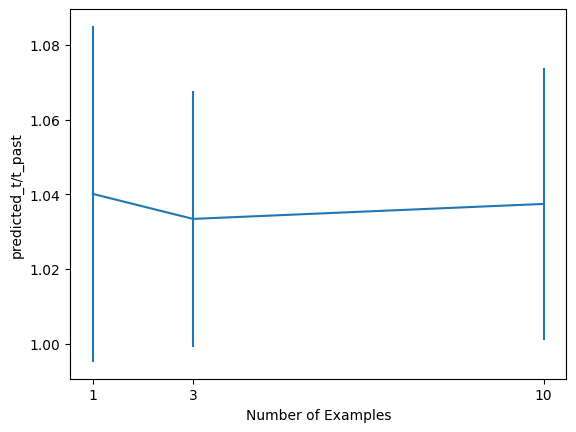

In [579]:
#plot davinci toxin results
fig = plt.figure()
x = [1, 3, 10]
toxin_y = [1.040106952, 1.03342246, 1.037433155]
toxin_yerr = [0.04496886983, 0.03431827246, 0.03651237574]
plt.ylabel("predicted_t/t_past")
plt.xlabel("Number of Examples")
plt.xticks([1, 3, 10])

plt.errorbar(x, toxin_y, yerr=toxin_yerr, label='both limits (default)')

In [429]:
#taxi with original prompt
def taxi_org(model, temp, p):
    taxi1 = openai.Completion.create(
    model=model,
    prompt="Imagine that your business requires you to travel by train to a certain town or city for ten weeks. \
        When the train pulls up at the station, you get into the first taxicab you find. As you get into the cab, you notice a serial number on the rear fender of your cab. \
        You are curious about this, and ask the driver how the cabs are labeled. He tells you that each cab is given a unique number between 1 and the total number of cabs in the company, \
        and that each number in that range corresponds to a cab. The serial number of this particular cab is 103.\n\nPlease write down your best guess of how many cabs there are in the company.\
        Try to make a guess, even if you feel like you don’t have enough information to make a decision—just go with your gut feeling.",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=0,
    presence_penalty=0
    )
    taxi2 = openai.Completion.create(
    model=model,
    prompt="Imagine that your business requires you to travel by train to a certain town or city for ten weeks. \
        When the train pulls up at the station, you get into the first taxicab you find. As you get into the cab, you notice a serial number on the rear fender of your cab. \
        You are curious about this, and ask the driver how the cabs are labeled. He tells you that each cab is given a unique number between 1 and the total number of cabs in the company, \
        and that each number in that range corresponds to a cab. The serial number of this particular cab is 103.\n\nPlease write down your best guess of how many cabs there are in the company.\
        Try to make a guess, even if you feel like you don’t have enough information to make a decision—just go with your gut feeling." \
        + taxi1.choices[0]['text'] + "\n\n Suppose that you check the serial numbers on two more cabs. Including the first cab, the serial numbers you've seen are 103, 34, and 72.\
        \n\nPlease write down your new best guess of how many cabs there are in the company.",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=0,
    presence_penalty=0
    )
    taxi3 = openai.Completion.create(
    model=model,
    prompt="Imagine that your business requires you to travel by train to a certain town or city for ten weeks. \
        When the train pulls up at the station, you get into the first taxicab you find. As you get into the cab, you notice a serial number on the rear fender of your cab. \
        You are curious about this, and ask the driver how the cabs are labeled. He tells you that each cab is given a unique number between 1 and the total number of cabs in the company, \
        and that each number in that range corresponds to a cab. The serial number of this particular cab is 103.\n\nPlease write down your best guess of how many cabs there are in the company.\
        Try to make a guess, even if you feel like you don’t have enough information to make a decision—just go with your gut feeling." \
        + taxi1.choices[0]['text'] + "\n\n Suppose that you check the serial numbers on two more cabs. Including the first cab, the serial numbers you've seen are 103, 34, and 72.\
        \n\nPlease write down your new best guess of how many cabs there are in the company."\
        + taxi2.choices[0]['text'] + "\n\n Suppose that you check the serial numbers on 7 more cabs. Including the first cab, the serial numbers you've seen are 103, 34, 72, 61, 17, 29, 101, 97, 42, and 52.\
        \n\nPlease write down your new best guess of how many cabs there are in the company.",
    temperature=temp,
    max_tokens=256,
    top_p=p,
    frequency_penalty=0,
    presence_penalty=0
    )

    return taxi1.choices[0]['text'], taxi2.choices[0]['text'], taxi3.choices[0]['text']

In [442]:
model = "text-davinci-003"
temp = 1.2
p = 1
taxi_results = taxi_org(model, temp, p)
print(taxi_results)

('\n\nMy best guess is that there are at least 103 cabs in the company.', '\n\nNow my best guess is that there are at least 72 cabs in the company.', '\n\nNow my best guess is that there are at least 101 cabs in the company.')


In [445]:
#create csv with davinci model on altered prompt
with open("davinci_taxi_temp_1_2_p_1.csv", "w") as file:
    temp = 1.2
    p = 1
    writer = csv.writer(file)
    writer.writerow(["Result 1", "Result 2", "Result 3"])
    for i in range(80):
        taxi_result = taxi_org(model="text-davinci-003", temp=temp, p=p)
        writer.writerow([taxi_result[0], taxi_result[1], taxi_result[2]])

<ErrorbarContainer object of 3 artists>

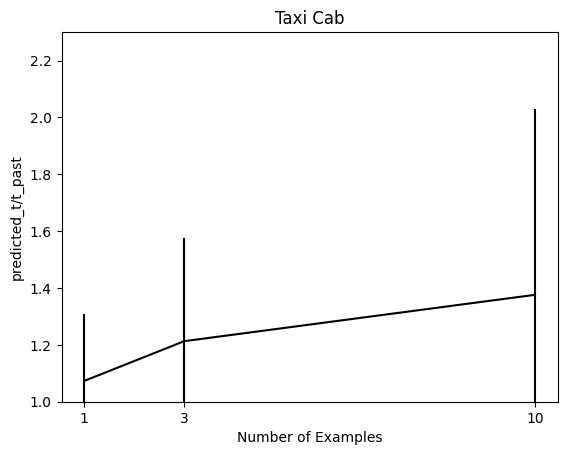

In [103]:
#plot davinci taxi results
fig = plt.figure()
x = [1, 3, 10]
taxi_y = [1.07300224, 1.213032114, 1.376026886]
taxi_yerr = [0.2366653586, 0.3620160601, 0.6545178631]
plt.ylabel("predicted_t/t_past")
plt.xlabel("Number of Examples")
plt.xticks([1, 3, 10])
plt.ylim(1, 2.3)
plt.title("Taxi Cab")

plt.errorbar(x, taxi_y, yerr=taxi_yerr, label='both limits (default)', color='k')

In [592]:
#bayesian model with erlang prior
def bayesian_model(beta, data, t):
    t_total = np.arange(0, t)
    erlang = t_total*np.exp(-t_total/beta)/beta**2
    median = np.array([])
    def likelihood(n, t, t_past):
        if t < t_past:
            return 0
        return (1/t)**n
    for d in data: 
        l = [likelihood(len(d), t, max(d)) for t in t_total]
        post = erlang*l/(np.sum(erlang*l))
        t = 0
        for i in range(len(post)):
            t += post[i]
            if t >= 0.5:
                median = np.append(median, i)
                break
            
    plt.plot([1, 3, 10], median/max(max(data)))
    return median/max(max(data))

[2.08823529 1.35294118 1.05882353]


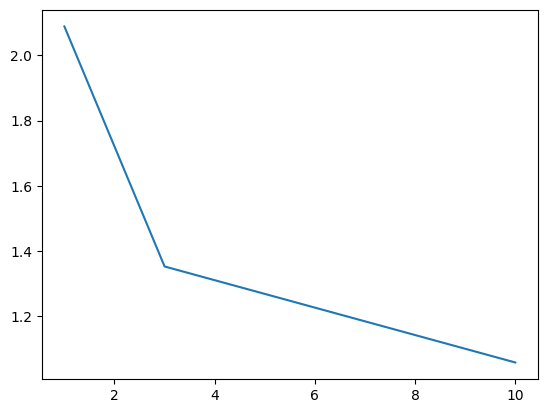

In [593]:
#tea_cake
beta = 1.6*34
data = [[34], [34, 8, 21], [34, 8, 21, 18, 2, 5, 27, 22, 10, 14]]
tea_bayes = bayesian_model(beta, data, 600)
print(tea_bayes)

[4.73786408 1.59223301 1.08737864]


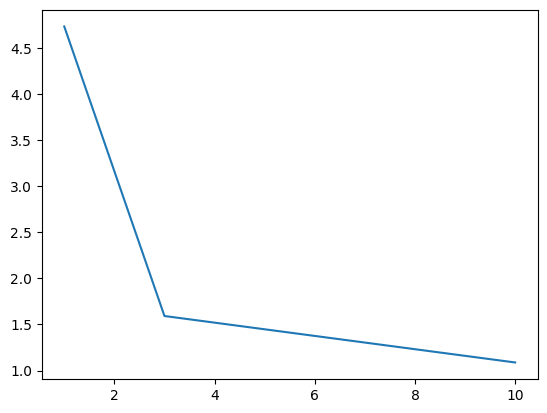

In [630]:
#train
beta = 5.4*103
data = [[103], [103, 34, 72], [103, 34, 72, 61, 17, 29, 101, 97, 42, 52]]
train_bayes = bayesian_model(beta, data, 10000)
print(train_bayes)

[1.47058824 1.23529412 1.05882353]


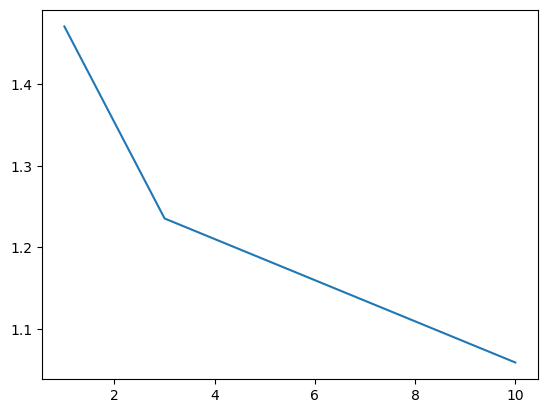

In [631]:
#toxin
beta = 0.7*34
data = [[34], [34, 8, 21], [34, 8, 21, 18, 2, 5, 27, 22, 10, 14]]
toxin_bayes = bayesian_model(beta, data, 10000)
print(toxin_bayes)

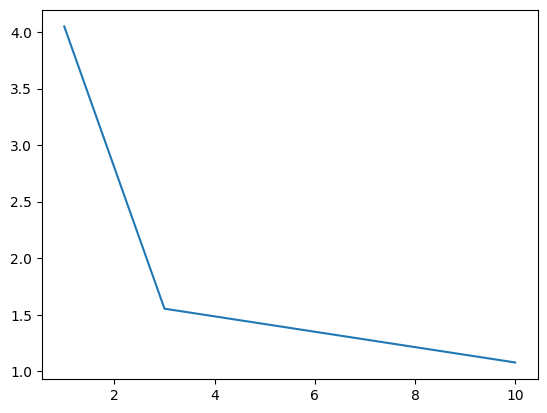

In [632]:
#taxi
beta = 4.4*103
data = [[103], [103, 34, 72], [103, 34, 72, 61, 17, 29, 101, 97, 42, 52]]
taxi_bayes = bayesian_model(beta, data, 10000)

Text(0.5, 1.0, 'PREDICTING THE FUTURE')

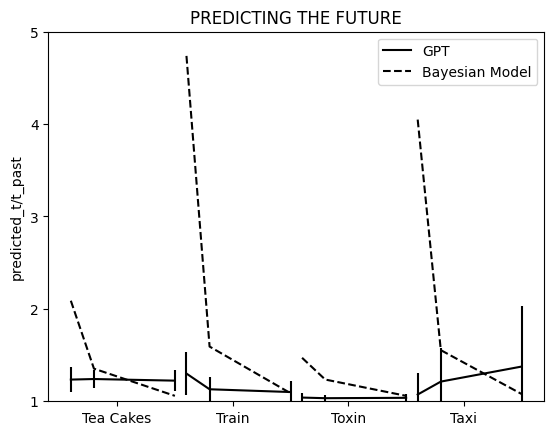

In [638]:
gpt_y= [tea_alt_y, train_y, toxin_y, taxi_y]
gpt_yerr = [tea_alt_yerr, train_yerr, toxin_yerr, taxi_yerr]
bayes_y = [tea_bayes, train_bayes, toxin_bayes, taxi_bayes]
x = np.array([1, 3, 10])
n = 0
for i in range(len(bayes_y)):
    
    plt.errorbar(x + n, gpt_y[i], yerr=gpt_yerr[i], color='k') 
    plt.plot(x + n, bayes_y[i], 'k--')
    
    n += 10
plt.ylabel("predicted_t/t_past")
plt.xticks([5, 15, 25, 35], ["Tea Cakes", "Train", "Toxin", "Taxi"])
gpt_line = Line2D([0], [0], label='GPT', color='k')
bayes_line = Line2D([0], [0], label='Bayesian Model', color='k', ls='--')
plt.legend(handles = [gpt_line, bayes_line], loc='upper right')
plt.ylim(1, 5)
plt.yticks([1, 2, 3, 4, 5])
plt.title('PREDICTING THE FUTURE')